min f(x)
# max f = min -f
tako da
g_i(x) <= b_i, i =1...m
# 3x0 + 5x1 <= 7 /\ 3x + 5x1 >= 7
# 4x0^2 + sinx1 <= 7

Linearno programiranje
polinomske slozenosti
min f
g_i(x) <= b_i

f(x) = c1x1 + c2x2 +...+ cnxn 
g_i(x) = a_i1 *x1 + ... + a_in * xn

min cx
A_ub*x <= b_ub
A_eq*x == b_eq

x \in Z^n
Celobrojno lp (ILP)
NP tezak
# x1 = 0.9 -> 1
# ...
# xn = 0.1 -> 0

In [1]:
# cplex, scipy optimize
# c simplex

In [2]:
from docplex.mp.model import Model 

In [3]:
# firma - proizvodi telefone - fiksne i mobilne

# prva faza: fiksni 0.2 sata, mobilni 0.4 sata
# druga faza: fiksni 0.5 sati, mobilni 0.4 sata
    
# fiksni - 12 evra
# mobilni - 20 evra

# odrediti broj fiksnih i mobilnih - maks profit
x - broj fiksnih
y - broj mobilnih

f(x, y) = x * 12 + y * 20 = c
y = (c - 12 * x) / 20

x * 0.2 + y * 0.4 <= 400
y <= (400 - 0.2*x) / 0.4


x * 0.5 + y * 0.4 <= 490

# prva faza za fiksni + prva faza za mobilni <= 400 sati
# druga faza za fiksni + druga faza za mobilni <= 490 sati

# moramo da napravimo najmanje 100 fiksnih i 100 mobilnih

In [4]:
from matplotlib import pyplot as plt
import numpy as np

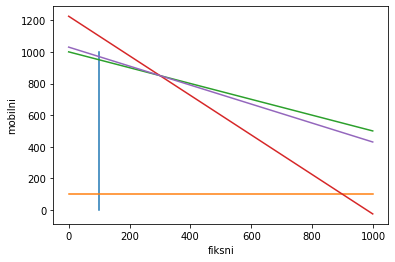

In [18]:
plt.plot([100, 100], [0, 1000], label='donja granica f.')
plt.plot([0, 1000], [100, 100], label='donja granica m.')
x = np.arange(0, 1000)
y = (400 - 0.2 * x) / 0.4
plt.plot(x, y, label='prva faza')
y2 = (490 - 0.5 * x) / 0.4
plt.plot(x, y2, label='druga faza')
c = 20600
y3 = (c - 12 * x) / 20
plt.plot(x, y3, label='funkcija cilja')
# plt.legend()
plt.xlabel('fiksni')
plt.ylabel('mobilni')
plt.show()

In [19]:
m = Model(name='proizvodnja telefona')

In [41]:
desk = m.continuous_var(name='desk')
desk

docplex.mp.Var(type=C,name='desk')

In [21]:
cell = m.continuous_var(name='cell')

In [22]:
m.add_constraint(desk >= 100)

docplex.mp.LinearConstraint[](desk,GE,100)

In [23]:
m.add_constraint(cell >= 100)

docplex.mp.LinearConstraint[](cell,GE,100)

In [24]:
m.add_constraint(0.2 * desk + 0.4*cell <= 400)

docplex.mp.LinearConstraint[](0.200desk+0.400cell,LE,400)

In [25]:
m.add_constraint(0.5 * desk + 0.4 * cell <= 490)

docplex.mp.LinearConstraint[](0.500desk+0.400cell,LE,490)

In [26]:
m.maximize(12 * desk + 20 * cell)

In [27]:
m.print_information()

Model: proizvodnja telefona
 - number of variables: 2
   - binary=0, integer=0, continuous=2
 - number of constraints: 4
   - linear=4
 - parameters: defaults
 - problem type is: LP


In [28]:
m.solve()

docplex.mp.solution.SolveSolution(obj=20600,values={desk:300,cell:850})

In [29]:
m.print_solution()

objective: 20600.000
  desk=300.000
  cell=850.000


In [37]:
#UFLP
def readInput(filename):
    with open(filename, 'r') as f:
        numUsers, numResources = [int(x) for x in f.readline().split()]
        cost = [[int(x) for x in f.readline().split()] for i in range(numUsers)]
        fixedCost = [int(x) for x in f.readline().split()]
        
        return numUsers, numResources, cost, fixedCost

In [56]:
numUsers, numResources, cost, fixedCost = readInput('../03/uflp1.txt')
cost
fixedCost

[12, 11, 13]

- skup korisnika I
- skup resursa J
- cena dodeljivanja korisnika i resursu j - $c_{ij}$
- cena uspostavljanja resursa j - $f_j$

$$min \sum_{i \in I} \sum_{j \in J} x_{ij} c_{ij}  + \sum_{j \in J} y_j f_j $$


$$ \sum_{j \in J} x_{ij} = 1, \forall i \in I $$


$$ x_{ij} \leq y_j, \forall i \in I, \forall j \in J $$

$$ x_{ij} \in \{0,1\} $$

$$ y_j \in \{0,1\} $$

In [47]:
model = Model(name='uflp')

In [48]:
x = model.binary_var_matrix(numUsers, numResources, name='x')
x

{(0, 0): docplex.mp.Var(type=B,name='x_0_0'),
 (0, 1): docplex.mp.Var(type=B,name='x_0_1'),
 (0, 2): docplex.mp.Var(type=B,name='x_0_2'),
 (1, 0): docplex.mp.Var(type=B,name='x_1_0'),
 (1, 1): docplex.mp.Var(type=B,name='x_1_1'),
 (1, 2): docplex.mp.Var(type=B,name='x_1_2'),
 (2, 0): docplex.mp.Var(type=B,name='x_2_0'),
 (2, 1): docplex.mp.Var(type=B,name='x_2_1'),
 (2, 2): docplex.mp.Var(type=B,name='x_2_2')}

In [49]:
y = model.binary_var_list(numResources, name='y')
y

[docplex.mp.Var(type=B,name='y_0'),
 docplex.mp.Var(type=B,name='y_1'),
 docplex.mp.Var(type=B,name='y_2')]

In [50]:
model.add_constraints([sum([x[i, j] for j in range(numResources)]) == 1 for i in range(numUsers)])

[docplex.mp.LinearConstraint[](x_0_0+x_0_1+x_0_2,EQ,1),
 docplex.mp.LinearConstraint[](x_1_0+x_1_1+x_1_2,EQ,1),
 docplex.mp.LinearConstraint[](x_2_0+x_2_1+x_2_2,EQ,1)]

In [51]:
for j in range(numResources):
    print(model.add_constraints([x[i, j] <= y[j] for i in range(numUsers)]))

[docplex.mp.LinearConstraint[](x_0_0,LE,y_0), docplex.mp.LinearConstraint[](x_1_0,LE,y_0), docplex.mp.LinearConstraint[](x_2_0,LE,y_0)]
[docplex.mp.LinearConstraint[](x_0_1,LE,y_1), docplex.mp.LinearConstraint[](x_1_1,LE,y_1), docplex.mp.LinearConstraint[](x_2_1,LE,y_1)]
[docplex.mp.LinearConstraint[](x_0_2,LE,y_2), docplex.mp.LinearConstraint[](x_1_2,LE,y_2), docplex.mp.LinearConstraint[](x_2_2,LE,y_2)]


In [52]:
model.print_information()

Model: uflp
 - number of variables: 12
   - binary=12, integer=0, continuous=0
 - number of constraints: 12
   - linear=12
 - parameters: defaults
 - problem type is: MILP


In [53]:
first_sum = sum([sum([x[i, j] * cost[i][j] for j in range(numResources)]) for i in range(numUsers)])
first_sum

docplex.mp.LinearExpr(x_0_0+12x_0_1+3x_0_2+2x_1_0+7x_1_1+41x_1_2+19x_2_0+21x_2_1+7x_2_2)

In [55]:
second_sum = sum([y[j] * fixedCost[j] for j in range(numResources)])
second_sum

docplex.mp.LinearExpr(12y_0+11y_1+13y_2)

In [57]:
model.minimize(first_sum + second_sum)

In [58]:
model.print_information()

Model: uflp
 - number of variables: 12
   - binary=12, integer=0, continuous=0
 - number of constraints: 12
   - linear=12
 - parameters: defaults
 - problem type is: MILP


In [60]:
solution = model.solve()

In [61]:
solution.display()

solution for: uflp
objective: 34
x_0_0 = 1
x_1_0 = 1
x_2_0 = 1
y_0 = 1


In [62]:
model.print_solution()

objective: 34
  x_0_0=1
  x_1_0=1
  x_2_0=1
  y_0=1


In [63]:
# model.sum()

# SSCFLP

- skup korisnika I
- skup resursa J
- cena dodeljivanja korisnika i resursu j - $c_{ij}$
- cena uspostavljanja resursa j - $f_j$

dodatno:
- svaki korisnik i ima potraznju - $d_i$
- svaki resurs j ima kapacitet - $s_j$

$$min \sum_{i \in I} \sum_{j \in J} x_{ij} c_{ij}  + \sum_{j \in J} y_j f_j $$


$$ \sum_{j \in J} x_{ij} = 1, \forall i \in I $$


$$ \sum_{i \in I} d_i x_{ij} \leq s_j y_j, \forall j \in J $$

In [102]:
d = [1 for x in range(numUsers)]
s = [1.5 for x in range(numResources)]

In [78]:
model = Model(name='sscflp')

In [79]:
x = model.binary_var_matrix(numUsers, numResources, name='x')
x

{(0, 0): docplex.mp.Var(type=B,name='x_0_0'),
 (0, 1): docplex.mp.Var(type=B,name='x_0_1'),
 (0, 2): docplex.mp.Var(type=B,name='x_0_2'),
 (1, 0): docplex.mp.Var(type=B,name='x_1_0'),
 (1, 1): docplex.mp.Var(type=B,name='x_1_1'),
 (1, 2): docplex.mp.Var(type=B,name='x_1_2'),
 (2, 0): docplex.mp.Var(type=B,name='x_2_0'),
 (2, 1): docplex.mp.Var(type=B,name='x_2_1'),
 (2, 2): docplex.mp.Var(type=B,name='x_2_2')}

In [80]:
y = model.binary_var_list(numResources, name='y')
y

[docplex.mp.Var(type=B,name='y_0'),
 docplex.mp.Var(type=B,name='y_1'),
 docplex.mp.Var(type=B,name='y_2')]

In [81]:
for i in range(numUsers):
    print(model.add_constraint(model.sum(x[i, j] for j in range(numResources)) == 1))

x_0_0+x_0_1+x_0_2 == 1
x_1_0+x_1_1+x_1_2 == 1
x_2_0+x_2_1+x_2_2 == 1


In [82]:
for j in range(numResources):
    print(model.add_constraint(model.sum(d[i] * x[i, j] for i in range(numUsers)) <= s[j] * y[j]))

x_0_0+x_1_0+x_2_0 <= 2y_0
x_0_1+x_1_1+x_2_1 <= 2y_1
x_0_2+x_1_2+x_2_2 <= 2y_2


In [83]:
first_sum = model.sum(model.sum(x[i,j] * cost[i][j] for j in range(numResources)) for i in range(numUsers))
first_sum

docplex.mp.LinearExpr(x_0_0+12x_0_1+3x_0_2+2x_1_0+7x_1_1+41x_1_2+19x_2_0+21x_2_1+7x_2_2)

In [84]:
second_sum = model.sum(y[j] * fixedCost[j] for j in range(numResources))
second_sum

docplex.mp.LinearExpr(12y_0+11y_1+13y_2)

In [85]:
model.minimize(first_sum + second_sum)

In [86]:
model.print_information()

Model: sscflp
 - number of variables: 12
   - binary=12, integer=0, continuous=0
 - number of constraints: 6
   - linear=6
 - parameters: defaults
 - problem type is: MILP


In [87]:
model.solve()

docplex.mp.solution.SolveSolution(obj=35,values={x_0_0:1,x_1_0:1,x_2_2:1..

In [88]:
model.print_solution()

objective: 35
  x_0_0=1
  x_1_0=1
  x_2_2=1
  y_0=1
  y_2=1


# MSCFLP

$$min \sum_{i \in I} \sum_{j \in J} x_{ij} c_{ij}  + \sum_{j \in J} y_j f_j $$


$$ \sum_{j \in J} x_{ij} = 1, \forall i \in I $$


$$ \sum_{i \in I} d_i x_{ij} \leq s_j y_j, \forall j \in J $$

In [103]:
model = Model(name='mscflp')

In [104]:
x = model.continuous_var_matrix(numUsers, numResources, name='x')
x

{(0, 0): docplex.mp.Var(type=C,name='x_0_0'),
 (0, 1): docplex.mp.Var(type=C,name='x_0_1'),
 (0, 2): docplex.mp.Var(type=C,name='x_0_2'),
 (1, 0): docplex.mp.Var(type=C,name='x_1_0'),
 (1, 1): docplex.mp.Var(type=C,name='x_1_1'),
 (1, 2): docplex.mp.Var(type=C,name='x_1_2'),
 (2, 0): docplex.mp.Var(type=C,name='x_2_0'),
 (2, 1): docplex.mp.Var(type=C,name='x_2_1'),
 (2, 2): docplex.mp.Var(type=C,name='x_2_2')}

In [105]:
y = model.binary_var_list(numResources, name='y')
y

[docplex.mp.Var(type=B,name='y_0'),
 docplex.mp.Var(type=B,name='y_1'),
 docplex.mp.Var(type=B,name='y_2')]

In [106]:
for i in range(numUsers):
    model.add_constraint(model.sum(x[i,j] for j in range(numResources)) == 1)

In [107]:
for j in range(numResources):
    model.add_constraint(model.sum(d[i] * x[i,j] for i in range(numUsers)) <= s[j] * y[j])

In [108]:
model.print_information()

Model: mscflp
 - number of variables: 12
   - binary=3, integer=0, continuous=9
 - number of constraints: 6
   - linear=6
 - parameters: defaults
 - problem type is: MILP


In [109]:
first_sum = model.sum(model.sum(x[i,j] * cost[i][j] for j in range(numResources)) for i in range(numUsers))

In [110]:
second_sum = model.sum(y[j] * fixedCost[j] for j in range(numResources))

In [111]:
model.minimize(first_sum + second_sum)

In [112]:
model.solve()

docplex.mp.solution.SolveSolution(obj=36,values={x_0_0:0.5,x_0_2:0.5,x_1..

In [113]:
model.print_solution()

objective: 36.000
  x_0_0=0.500
  x_0_2=0.500
  x_1_0=1.000
  x_2_2=1.000
  y_0=1
  y_2=1


In [4]:
from scipy import optimize as opt
import numpy as np

$$min f(x_0, x_1) = 3x_0 + 4x_1 $$

$$ x_0 + 2x_1 \leq 14 $$
$$ x1 \leq 3x_0 $$
$$ x_0 - x_1 \leq 2 $$

In [5]:
# f(x) = c*x
c = np.array([3, 4])
A_ub = np.array([[1,2],
                 [-3, 1],
                 [1, -1]])
b_ub = np.array([14, 0, 2])

opt.linprog(c=c, A_ub=A_ub, b_ub=b_ub)

     con: array([], dtype=float64)
     fun: 3.407511066260325e-10
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([1.40000000e+01, 2.81844599e-10, 2.00000000e+00])
  status: 0
 success: True
       x: array([9.78753002e-11, 1.17813015e-11])

$$ f(x, y) = 2xy + 2x - x^2 - y^2 $$

$$ g_1(x, y) = x ^3 - y = 0 $$

$$ g_2(x, y) = y - 1 >= 0 $$

In [10]:
def f(x):
    return 2 * x[0] * x[1] + 2 * x[0] - x[0]**2 - x[1]**2

# R^n -> R


c = [
    {
        'type': 'eq',
        'fun': lambda x: np.array([x[0] ** 3 - x[1]]),
        'jac': lambda x: np.array([3 * x[0]**2, -1])
    },
    {
        'type': 'ineq', 
        'fun': lambda x: np.array([-x[1] + 1]),
        'jac': lambda x: np.array([0, -1])
    }
]

opt.minimize(f, (0, 0), constraints=c, method='SLSQP')

     fun: -3.9658539922004776e+16
     jac: array([-5.36870912e+08,  0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 302
     nit: 60
    njev: 60
  status: 0
 success: True
       x: array([-5.83969114e+02, -1.99145104e+08])